<a href="https://colab.research.google.com/github/sbk090326/ComputerVision/blob/main/%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 파일 압축 해제
!unzip /content/drive/MyDrive/archive.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/tra

In [ ]:
# 필요한 모듈 import하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import glob
import shutil

In [ ]:
# 파일 디렉토리 생성 
os.mkdir('/content/chest_xray/sample')

os.mkdir('/content/chest_xray/sample/train')
os.mkdir('/content/chest_xray/sample/test')

os.mkdir('/content/chest_xray/sample/train/NORMAL')
os.mkdir('/content/chest_xray/sample/train/PNEUMONIA')
os.mkdir('/content/chest_xray/sample/test/NORMAL')
os.mkdir('/content/chest_xray/sample/test/PNEUMONIA')

FileExistsError: ignored

In [ ]:
#이미지 파일 복사 함수

def copy_images(source_folder, destination_folder, num_images):
    # 소스 폴더에서 이미지 파일 목록 가져오기
    image_files = [f for f in os.listdir(source_folder) if f.endswith('.jpeg') or f.endswith('.png')]

    # 이미지 파일을 지정된 개수만큼 다른 폴더로 복사
    count = 0
    for image_file in image_files:
        source_path = os.path.join(source_folder, image_file)
        destination_path = os.path.join(destination_folder, image_file)
        shutil.copy2(source_path, destination_path)
        count += 1

        if count >= num_images:
            break

    print(f'{count}장의 이미지 파일이 {destination_folder}로 복사되었습니다.')

# 변수 입력
source_folder = '/content/chest_xray/chest_xray/test/NORMAL'
destination_folder = '/content/chest_xray/sample/test/NORMAL'
num_images = 100

copy_images(source_folder, destination_folder, num_images)


100장의 이미지 파일이 /content/chest_xray/sample/test/NORMAL로 복사되었습니다.


In [ ]:
#해당 디렉토리 삭제
import shutil
shutil.rmtree('/content/chest_xray/sample/test/PNEUMONIA')

In [ ]:
# 파일로부터 영상을 읽어서 data에 저장하기
labels = ['PNEUMONIA', 'NORMAL']
img_size = 299
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('/content/chest_xray/sample/train')
test = get_training_data('/content/chest_xray/sample/test')
#val = get_training_data('./chest_xray/val')

<ipython-input-6-0a18418375b5>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
print(train.shape) # 학습데이터
print(test.shape)  #테스트 데이터

(800, 2)
(200, 2)


In [ ]:
for feature, label in train:
  print(feature)
  print(label)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [123 123 123]
  [132 132 132]
  [113 113 113]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [135 135 135]
  [126 126 126]
  [ 98  98  98]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [134 134 134]
  [107 107 107]
  [ 58  58  58]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
1
[[[ 71  71  71]
  [ 74  74  74]
  [ 74  74  74]
  ...
  [149 149 149]
  [141 141 141]
  [128 128 128]]

 [[ 74  74  74]
  [ 72  72  72]
  [ 74  74  74]
  ...
  [141 141 141]
  [134 134 134]
  [120 120 120]]

 [[ 72  72  72]
  [ 71  71  71]
  [ 70  70  70]
  ...
  [141 141 141]
  [129 129 129]
  [125 125 125]]

 ...

 [[  2   2   2

Text(0.5, 1.0, 'NORMAL')

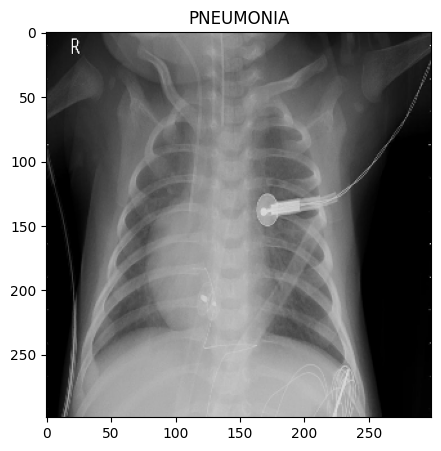

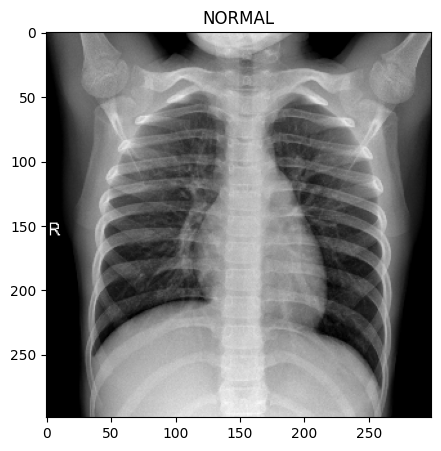

In [ ]:
#영상으로 보이기
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

#for feature, label in val:
#    x_val.append(feature)
#    y_val.append(label)

#데이터 정규화

In [ ]:
# 데이터를 Normalize 0~255  --->   0~1
x_train = np.array(x_train) / 255
#x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
# 3채널 딥러닝을 위해 data를 resize
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

#x_val = x_val.reshape(-1, img_size, img_size, 3)
#y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

#이미지 어그멘테이션

In [ ]:
# data augmentation하기 (overfitting을 막고, 데이터셋내의 데이터 불균형도 어느 정도 해소)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# InceptionV3 모델 미세조정

In [ ]:
#InceptionV3 모델 미세조정
from keras.applications import InceptionV3
inception = InceptionV3(weights='imagenet',input_shape=(299,299,3) , include_top=True)
for layer in inception.layers[:]:
  layer.trainable = True

base_inputs= inception.layers[0].input
base_outputs= inception.layers[-2].output
classifier=tf.keras.layers.Dense(2)(base_outputs)
new_model = keras.Model(inputs=base_inputs,outputs=classifier)

new_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=("accuracy"),
)
print(new_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

#모델 학습

In [ ]:
#모델 학습
history = new_model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12)

Epoch 1/15
25/25 [==============================] - 73s 739ms/step - loss: 0.4092 - accuracy: 0.8475
Epoch 2/15
25/25 [==============================] - 20s 795ms/step - loss: 0.2630 - accuracy: 0.8938
Epoch 3/15
25/25 [==============================] - 19s 744ms/step - loss: 0.1927 - accuracy: 0.9287
Epoch 4/15
25/25 [==============================] - 20s 788ms/step - loss: 0.1338 - accuracy: 0.9463
Epoch 5/15
25/25 [==============================] - 19s 749ms/step - loss: 0.0801 - accuracy: 0.9675
Epoch 6/15
25/25 [==============================] - 19s 751ms/step - loss: 0.1188 - accuracy: 0.9575
Epoch 7/15
25/25 [==============================] - 20s 783ms/step - loss: 0.0772 - accuracy: 0.9700
Epoch 8/15
25/25 [==============================] - 19s 745ms/step - loss: 0.1206 - accuracy: 0.9550
Epoch 9/15
25/25 [==============================] - 20s 804ms/step - loss: 0.1027 - accuracy: 0.9663
Epoch 10/15
25/25 [==============================] - 19s 754ms/step - loss: 0.0776 - accura

#성능 평가

In [ ]:
#평가
print("Loss of the model is - " , new_model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , new_model.evaluate(x_test,y_test)[1]*100 , "%")

7/7 [==============================] - 3s 314ms/step - loss: 0.4164 - accuracy: 0.9100
Loss of the model is -  0.4163791239261627
7/7 [==============================] - 1s 109ms/step - loss: 0.4164 - accuracy: 0.9100
Accuracy of the model is -  91.00000262260437 %


# 모델 정확도 및 손실값 그래프

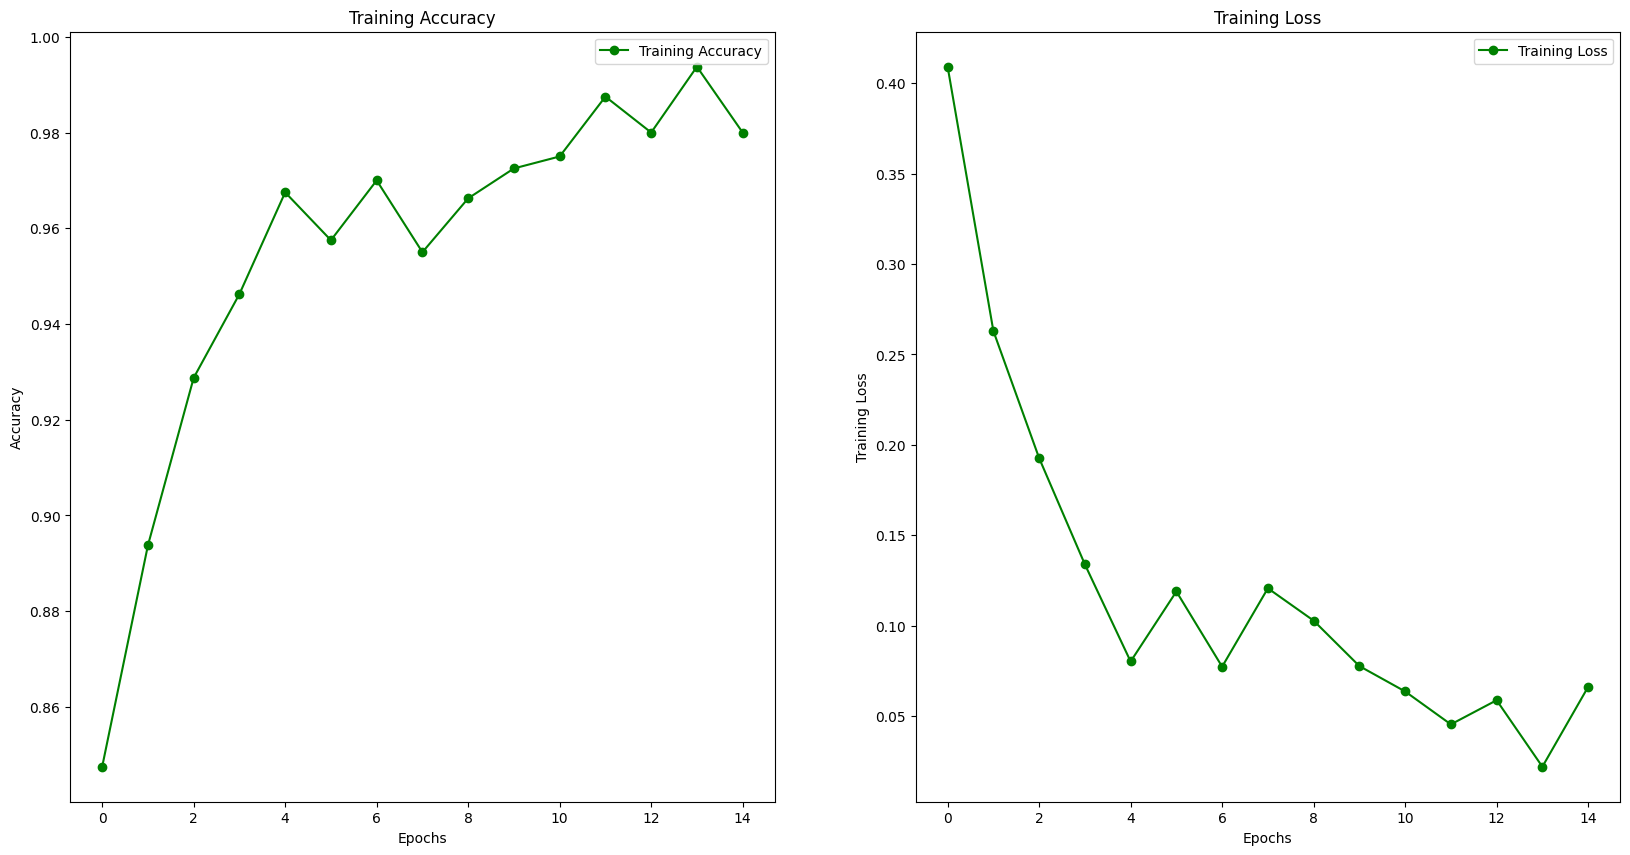

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
#val_acc = history.history['val_accuracy']
#val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
#ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
#ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training Loss")
plt.show()